In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import sys
from sklearn.datasets import load_breast_cancer

import warnings
warnings.filterwarnings('ignore')

#Set same randomstate for each occurence
RSTATE = 0

#Import breast cancer data
breast = load_breast_cancer() 
breast_data = breast.data
breast_data.shape


(569, 30)

In [2]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
breast_labels = breast.target
print(breast_labels.shape)
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1) 
print(final_breast_data.shape)

(569,)
(569, 31)


In [4]:
breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names 
print(features)
features_labels = np.append(features,'label') 
breast_dataset.columns = features_labels 
#breast_dataset.head()

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
breast_dataset['label'].replace(0, 'Benign',inplace=True) 
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [6]:
#80% to 20% train to test split:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(breast_input, labels, test_size = 0.20, random_state = RSTATE)
#Scale data with standardization:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

[[45  2]
 [ 2 65]]
Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Text(0.5, 257.44, 'Predicted label')

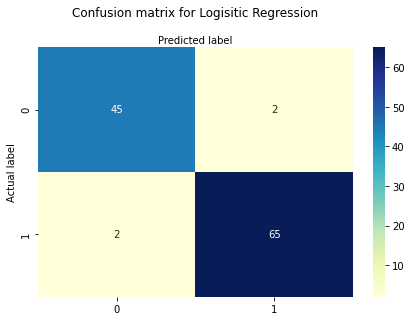

In [7]:
#Question 1:

#Import LogisticRegression from sklearn.linear_model 
#Make an instance classifier of the object LogisticRegression and give random_state =  
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=RSTATE) 
classifier.fit(X_train, Y_train) 
#load prediction
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
print(cnf_matrix)
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 
#Visualize the confusion matrix with a heatmap:
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix for Logisitic Regression', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 


Results for PCA with K=1
Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
0.9035087719298246
1


Results for PCA with K=2
Accuracy: 0.9298245614035088
Precision: 0.9682539682539683
Recall: 0.9104477611940298
0.9298245614035088
2


Results for PCA with K=3
Accuracy: 0.9122807017543859
Precision: 0.9384615384615385
Recall: 0.9104477611940298
0.9298245614035088
3


Results for PCA with K=4
Accuracy: 0.9473684210526315
Precision: 0.9552238805970149
Recall: 0.9552238805970149
0.9473684210526315
4


Results for PCA with K=5
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
0.956140350877193
5


Results for PCA with K=6
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
0.956140350877193
6


Results for PCA with K=7
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
0.956140350877193
7


Results for PCA with K=8
Accuracy: 0.956140350877193
Precision: 0.95

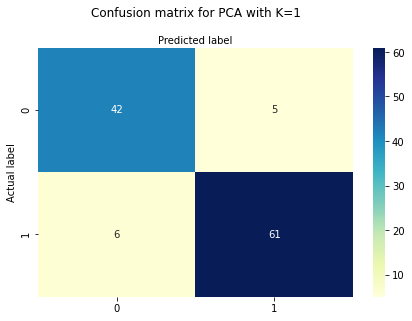

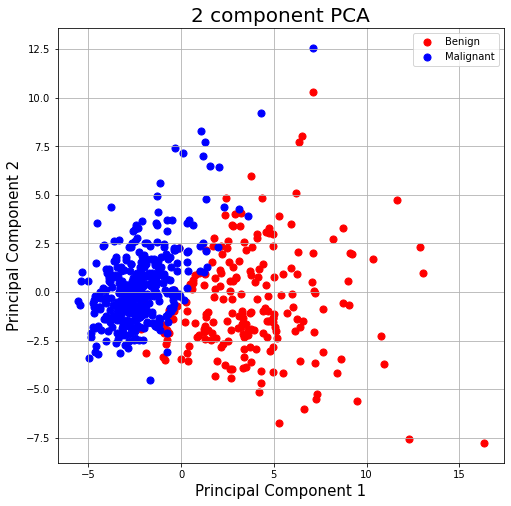

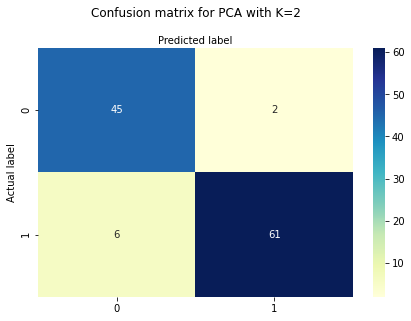

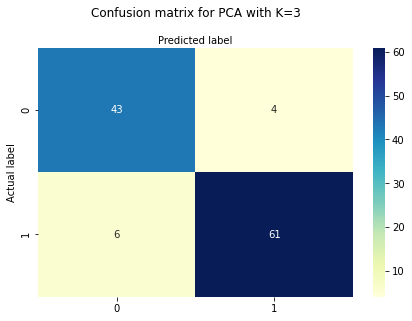

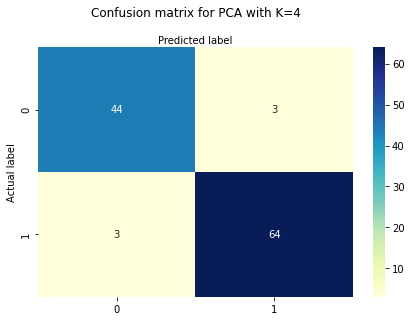

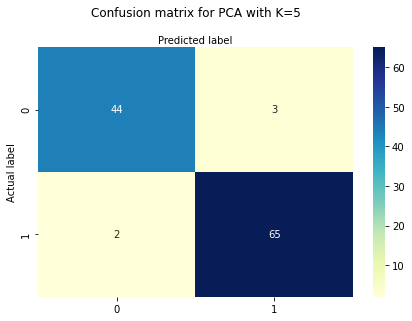

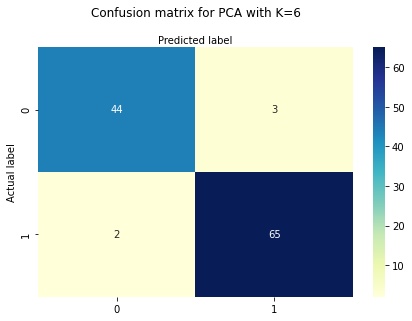

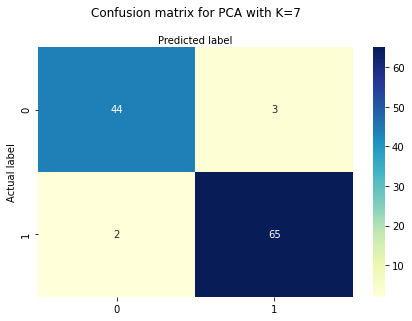

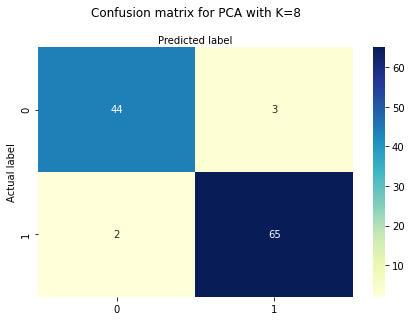

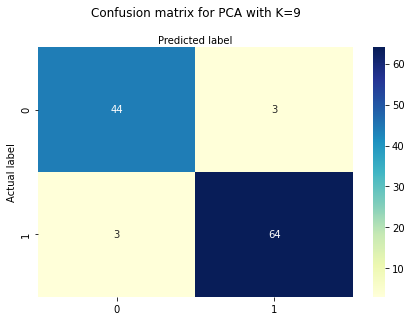

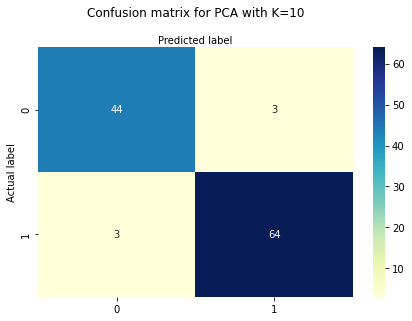

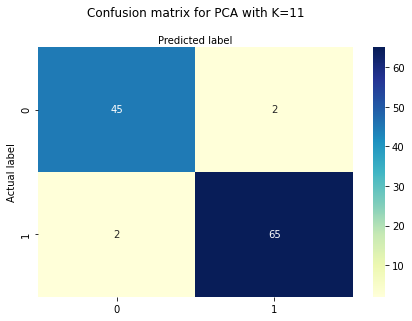

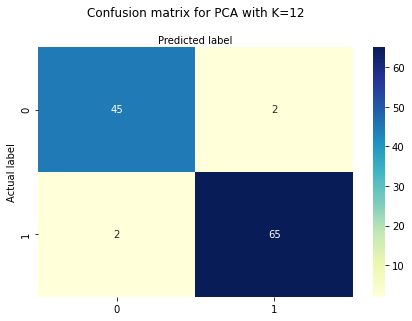

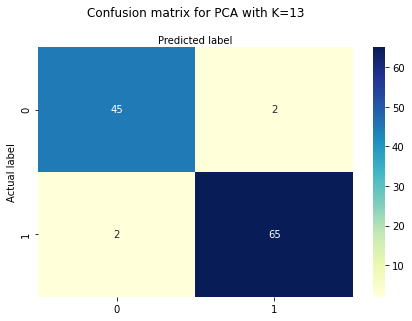

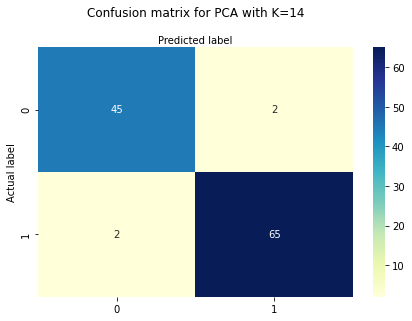

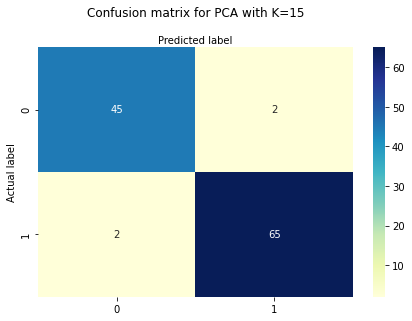

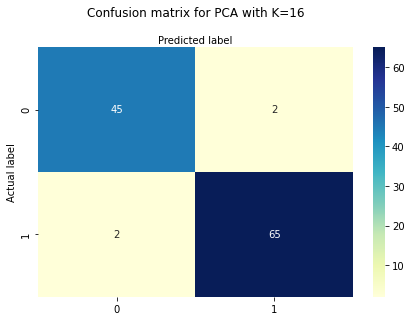

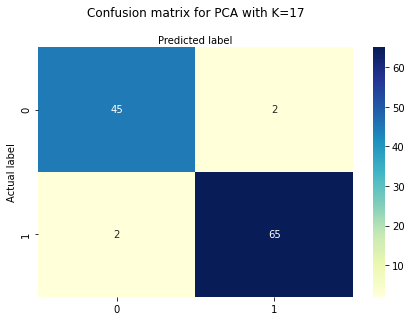

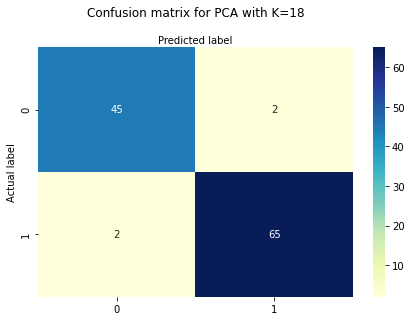

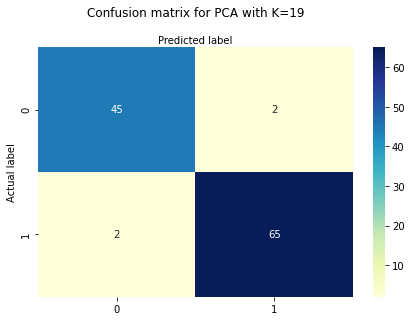

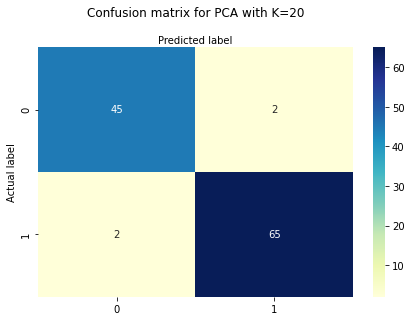

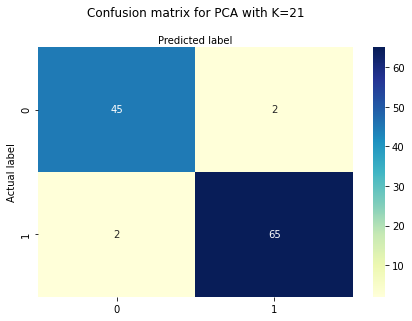

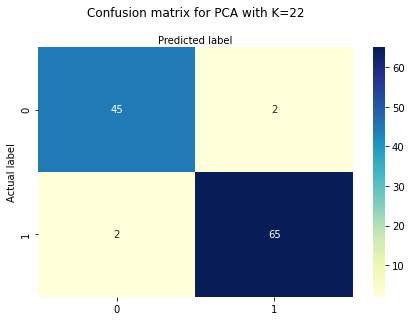

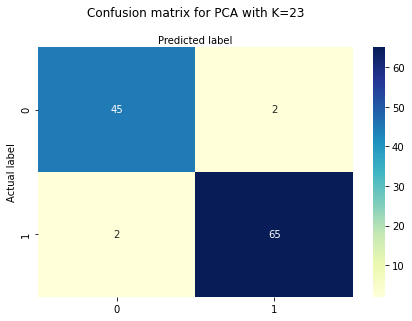

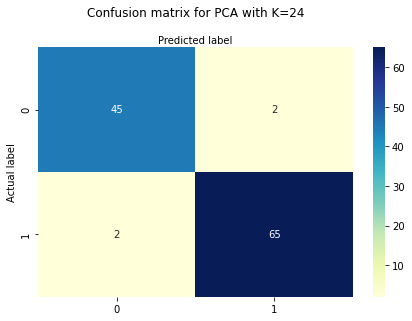

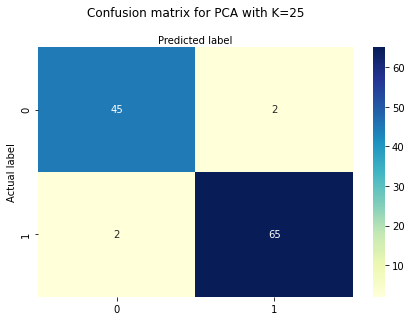

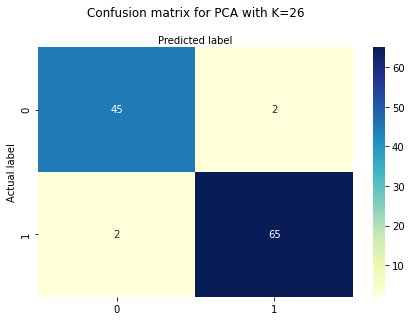

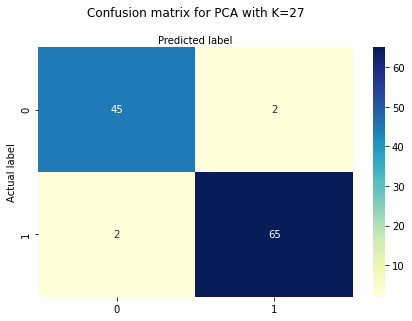

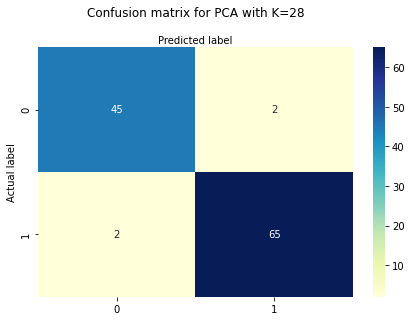

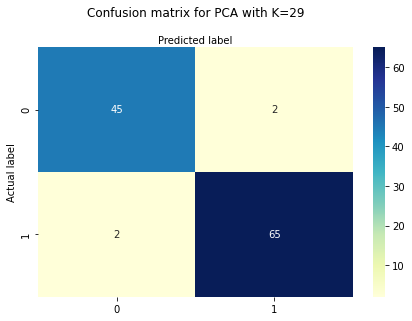

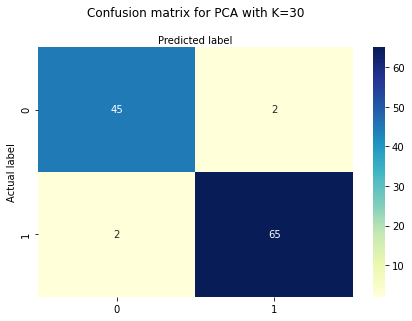

In [8]:
#Question 2:

from sklearn.decomposition import PCA 

X = StandardScaler().fit_transform(breast_input)
Y = breast_labels

K = np.empty([30,1])
Acc = np.empty([30,1])
Pre = np.empty([30,1])
Rec = np.empty([30,1])

#Check the results for every number of PC from 1 to 30.
for n in range(1, 31):
    pca = PCA(n_components=n) 
    principalComponents = pca.fit_transform(X) 

    #Show distribution of first two principal components
    if n == 2:
        principalDf = pd.DataFrame(data = principalComponents 
                     , columns = ['principal component 1', 'principal component 2'])
        finalDf = pd.concat([principalDf, breast_dataset[['label']]], axis = 1)

        fig = plt.figure(figsize = (8,8)) 
        ax = fig.add_subplot(1,1,1)  
        ax.set_xlabel('Principal Component 1', fontsize = 15) 
        ax.set_ylabel('Principal Component 2', fontsize = 15) 
        ax.set_title('2 component PCA', fontsize = 20) 
        targets = ['Benign', 'Malignant'] 
        colors = ['r', 'b'] 
        for target, color in zip(targets,colors): 
            indicesToKeep = finalDf['label'] == target 
            ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] 
                       , finalDf.loc[indicesToKeep, 'principal component 2'] 
                       , c = color 
                       , s = 50) 
        ax.legend(targets) 
        ax.grid() 
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y, test_size = 0.20, random_state = RSTATE)
    classifier = LogisticRegression(random_state=RSTATE) 
    classifier.fit(X_train, Y_train) 
    #load prediction
    Y_pred = classifier.predict(X_test)
    from sklearn.metrics import confusion_matrix 
    cnf_matrix = confusion_matrix(Y_test, Y_pred) 
    #print(cnf_matrix)
    from sklearn import metrics 
    print("Results for PCA with K=%i" %n)
    print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
    print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
    print("Recall:",metrics.recall_score(Y_test, Y_pred))
    
    #Store accuracy and related number of principal components, K. 
    K[n-1] = n
    Acc[n-1] = metrics.accuracy_score(Y_test, Y_pred)
    Pre[n-1] = metrics.precision_score(Y_test, Y_pred)
    Rec[n-1] = metrics.recall_score(Y_test, Y_pred)
    
    MAcc = 0.0
    MPre = 0.0
    MRec = 0.0
    MAcc_K = 0
    MPre_K = 0
    MRec_K = 0
    
    if MAcc < np.amax(Acc):
        MAcc = np.amax(Acc);
        MAcc_K = n;
        print(MAcc)
        print(MAcc_K)
        
    if MPre < np.amax(Pre):
        MPre = np.amax(Pre);
        MPre_K = n;
        
    if MRec < np.amax(Rec):
        MRec = np.amax(Rec);
        MRec_K = n;
        
    print("\n")
        
    #Visualize the confusion matrix with a heatmap:
    import seaborn as sns 
    class_names=[0,1] # name  of classes 
    fig, ax = plt.subplots() 
    tick_marks = np.arange(len(class_names)) 
    plt.xticks(tick_marks, class_names) 
    plt.yticks(tick_marks, class_names) 
    # create heatmap 
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
    ax.xaxis.set_label_position("top") 
    plt.tight_layout() 
    plt.title('Confusion matrix for PCA with K=%i' %n, y=1.1) 
    plt.ylabel('Actual label') 
    plt.xlabel('Predicted label') 



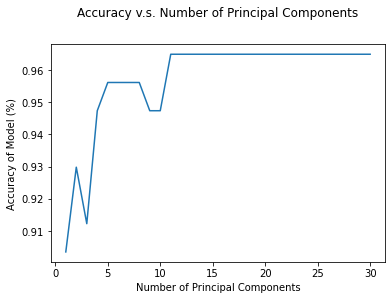

In [9]:
#Plot Accuracy over K principal components
#print(K.shape)
#print(Acc)
#print(max(Acc))

ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Accuracy v.s. Number of Principal Components', y=1.1) 
plt.ylabel('Accuracy of Model (%)') 
plt.xlabel('Number of Principal Components') 
plt.plot(K, Acc)

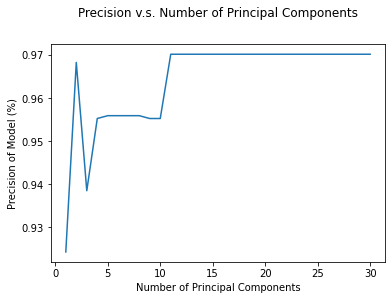

In [10]:
#Plot Precision over K principal components
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Precision v.s. Number of Principal Components', y=1.1) 
plt.ylabel('Precision of Model (%)') 
plt.xlabel('Number of Principal Components') 
plt.plot(K, Pre)

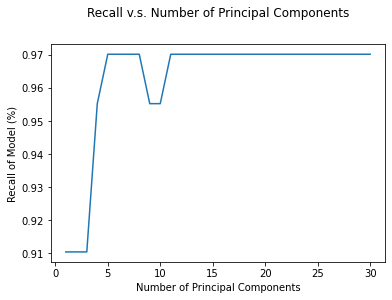

In [11]:
#Plot Recall over K principal components
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Recall v.s. Number of Principal Components', y=1.1) 
plt.ylabel('Recall of Model (%)') 
plt.xlabel('Number of Principal Components') 
plt.plot(K, Rec)

In [12]:
#Highest metric results for the PCA over K Principal Components
print("Highest Accuracy:",MAcc,". K = ", MAcc_K) 
print("Highest Precision:",MPre,". K = ", MPre_K) 
print("Highest Recall:",MRec,". K = ", MRec_K) 

Highest Accuracy: 0.9649122807017544 . K =  30
Highest Precision: 0.9701492537313433 . K =  30
Highest Recall: 0.9701492537313433 . K =  30


[[43  4]
 [ 0 67]]
Accuracy: 0.9649122807017544
Precision: 0.9436619718309859
Recall: 1.0


Text(0.5, 257.44, 'Predicted label')

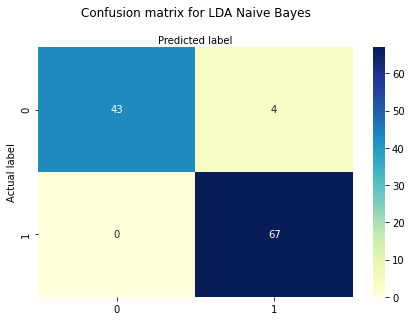

In [13]:
#Question 3:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = StandardScaler().fit_transform(breast_input)
#X = breast_input
Y = breast_labels
lda = LinearDiscriminantAnalysis(n_components=1) 
lda_t = lda.fit_transform(X,Y) 
#print(lda_t)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state = RSTATE) 
lda.fit(X_train,Y_train) 
Y_pred = lda.predict(X_test) 
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
print(cnf_matrix)
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

#Plot confusion matrix
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix for LDA Naive Bayes', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 


[[45  2]
 [ 1 66]]
Accuracy: 0.9736842105263158
Precision: 0.9705882352941176
Recall: 0.9850746268656716


Text(0.5, 257.44, 'Predicted label')

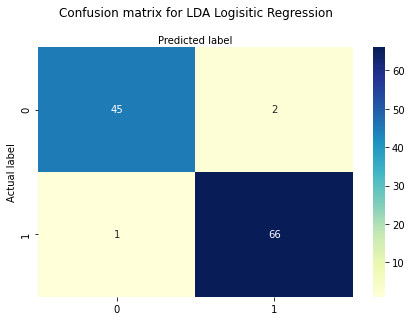

In [14]:
#Question 4:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier = LogisticRegression(random_state=RSTATE) 
X = StandardScaler().fit_transform(breast_input)
#X = breast_input
Y = breast_labels
lda = LinearDiscriminantAnalysis(n_components=1) 
lda_t = lda.fit_transform(X,Y) 
classifier.fit(lda_t,Y)
#print(lda_t)
X_train,X_test,Y_train,Y_test = train_test_split(lda_t,Y,test_size=0.2, random_state = RSTATE) 
#lda.fit(X_train,Y_train)  
Y_pred = classifier.predict(X_test) 
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
print(cnf_matrix)
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

#Plot confusion matrix
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix for LDA Logisitic Regression', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 


In [15]:
# from matplotlib.colors import ListedColormap 
# X_set, Y_set = X_test, Y_test 
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green'))) 
# plt.xlim(X1.min(), X1.max()) 
# plt.ylim(X2.min(), X2.max()) 
# for i, j in enumerate(np.unique(Y_set)): 
#     plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], 
#                 c = ListedColormap(('yellow', 'blue'))(i), label = j) 
# plt.title('Logistic Regression (Test set)') 
# plt.xlabel('Age') 
# plt.ylabel('Estimated Salary') 
# plt.legend() 
# plt.show() 